In [1]:
import sys
sys.path.append('..')

In [2]:
import pixiedust
import matplotlib.pyplot as plt

from pyquaternion import Quaternion 
from Utilities import *

Pixiedust database opened successfully


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [256]:
import pandas as pd
import numpy as np

from VectorMath import *
from Utilities import *

from keras import losses
from keras.layers import Dense, LSTM
from keras.models import Model, Sequential
from keras.regularizers import L1L2

from sklearn.metrics import mean_squared_error
from pyquaternion import Quaternion

In [4]:
%matplotlib inline

np.random.seed=1

In [268]:
def get_sequence(_X, _y, time_steps):
    X, y = np.copy(_X), np.copy(_y)
    X_length, _ = X.shape
    
    X_seq, y_seq = [], []
    for i in range(0, X_length-time_steps, time_steps):
        end = i + time_steps
        X_seq.append(X[i:end])
        y_seq.append(y[end-1])
    
    return np.array(X_seq), np.array(y_seq)
        
        
def build_model(input_shape, output_dim, dropout=0.2, l2=0.1):
    model = Sequential()
    
    model.add(LSTM(units=80, input_shape=input_shape, dropout=dropout))
    model.add(Dense(units=output_dim, activation='linear', bias_regularizer=L1L2(l2=l2)))
    model.compile(optimizer='rmsprop', loss='mse')
    
    return model

In [145]:
dataset = pd.read_csv('../datasets/10hz.csv')

length, _ = dataset.shape
#X, y = getXyVelocityModel(dataset, limit=length, frequency=10.0)

In [213]:
time_steps = 3
X_sequence, y_sequence = get_sequence(X.values, y.values, time_steps=time_steps)

train = int(0.8 * X_sequence.shape[0])
xTrain, xTest, yTrain, yTest = X_sequence[:train], X_sequence[train:], y_sequence[:train], y_sequence[train:]

In [269]:
model = build_model(input_shape=(time_steps, 12), output_dim=6, dropout=0.1, l2=3.0)
model.fit(xTrain, yTrain, epochs=1000, batch_size=600)

Epoch 1/1000
9500/9500 [==============================] - 0s 48us/step - loss: 0.6169
Epoch 2/1000
9500/9500 [==============================] - 0s 14us/step - loss: 0.2781
Epoch 3/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.1940
Epoch 4/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.1656
Epoch 5/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.1412
Epoch 6/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.1262
Epoch 7/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.1140
Epoch 8/1000
9500/9500 [==============================] - 0s 13us/step - loss: 0.1034
Epoch 9/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0903
Epoch 10/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0832
Epoch 11/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0718
Epoch 12/1000
9500/9500 [===========================

9500/9500 [==============================] - 0s 12us/step - loss: 0.0134
Epoch 96/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0136
Epoch 97/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0132
Epoch 98/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0135
Epoch 99/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0138
Epoch 100/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0131
Epoch 101/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0134
Epoch 102/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0132
Epoch 103/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0121
Epoch 104/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0127
Epoch 105/1000
9500/9500 [==============================] - 0s 16us/step - loss: 0.0116
Epoch 106/1000
9500/9500 [=========================

9500/9500 [==============================] - 0s 11us/step - loss: 0.0081
Epoch 189/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0085
Epoch 190/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0083
Epoch 191/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0082
Epoch 192/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0083
Epoch 193/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0080
Epoch 194/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0083
Epoch 195/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0088
Epoch 196/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0088
Epoch 197/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0084
Epoch 198/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0082
Epoch 199/1000
9500/9500 [=====================

9500/9500 [==============================] - 0s 11us/step - loss: 0.0067
Epoch 282/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0063
Epoch 283/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0069
Epoch 284/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0063
Epoch 285/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0061
Epoch 286/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0062
Epoch 287/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0069
Epoch 288/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0068
Epoch 289/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0065
Epoch 290/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0064
Epoch 291/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0062
Epoch 292/1000
9500/9500 [=====================

9500/9500 [==============================] - 0s 11us/step - loss: 0.0055
Epoch 375/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0052
Epoch 376/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0055
Epoch 377/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0050
Epoch 378/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0053
Epoch 379/1000
9500/9500 [==============================] - 0s 13us/step - loss: 0.0051
Epoch 380/1000
9500/9500 [==============================] - 0s 13us/step - loss: 0.0054
Epoch 381/1000
9500/9500 [==============================] - 0s 13us/step - loss: 0.0053
Epoch 382/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0052
Epoch 383/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0055
Epoch 384/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0050
Epoch 385/1000
9500/9500 [=====================

9500/9500 [==============================] - 0s 11us/step - loss: 0.0053
Epoch 468/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0049
Epoch 469/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0043
Epoch 470/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0046
Epoch 471/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0044
Epoch 472/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0048
Epoch 473/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0046
Epoch 474/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0049
Epoch 475/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0045
Epoch 476/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0049
Epoch 477/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0049
Epoch 478/1000
9500/9500 [=====================

9500/9500 [==============================] - 0s 14us/step - loss: 0.0040
Epoch 561/1000
9500/9500 [==============================] - 0s 14us/step - loss: 0.0044
Epoch 562/1000
9500/9500 [==============================] - 0s 14us/step - loss: 0.0041
Epoch 563/1000
9500/9500 [==============================] - 0s 15us/step - loss: 0.0047
Epoch 564/1000
9500/9500 [==============================] - 0s 15us/step - loss: 0.0041
Epoch 565/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0043
Epoch 566/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0042
Epoch 567/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0041
Epoch 568/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0042
Epoch 569/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0045
Epoch 570/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0043
Epoch 571/1000
9500/9500 [=====================

9500/9500 [==============================] - 0s 11us/step - loss: 0.0040
Epoch 654/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0039
Epoch 655/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0038
Epoch 656/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0037
Epoch 657/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0038
Epoch 658/1000
9500/9500 [==============================] - 0s 13us/step - loss: 0.0039
Epoch 659/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0040
Epoch 660/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0037
Epoch 661/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0039
Epoch 662/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0038
Epoch 663/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0035
Epoch 664/1000
9500/9500 [=====================

9500/9500 [==============================] - 0s 12us/step - loss: 0.0036
Epoch 747/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0034
Epoch 748/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0035
Epoch 749/1000
9500/9500 [==============================] - 0s 12us/step - loss: 0.0033
Epoch 750/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0034
Epoch 751/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0038
Epoch 752/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0035
Epoch 753/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0033
Epoch 754/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0036
Epoch 755/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0035
Epoch 756/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0034
Epoch 757/1000
9500/9500 [=====================

9500/9500 [==============================] - 0s 11us/step - loss: 0.0031
Epoch 840/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0029
Epoch 841/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0030
Epoch 842/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0031
Epoch 843/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0031
Epoch 844/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0031
Epoch 845/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0033
Epoch 846/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0031
Epoch 847/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0032
Epoch 848/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0030
Epoch 849/1000
9500/9500 [==============================] - 0s 11us/step - loss: 0.0034
Epoch 850/1000
9500/9500 [=====================

9500/9500 [==============================] - 0s 13us/step - loss: 0.0030
Epoch 933/1000
9500/9500 [==============================] - 0s 13us/step - loss: 0.0029
Epoch 934/1000
9500/9500 [==============================] - 0s 13us/step - loss: 0.0031
Epoch 935/1000
9500/9500 [==============================] - 0s 13us/step - loss: 0.0029
Epoch 936/1000
9500/9500 [==============================] - 0s 14us/step - loss: 0.0032
Epoch 937/1000
9500/9500 [==============================] - 0s 13us/step - loss: 0.0030
Epoch 938/1000
9500/9500 [==============================] - 0s 13us/step - loss: 0.0031
Epoch 939/1000
9500/9500 [==============================] - 0s 16us/step - loss: 0.0029
Epoch 940/1000
9500/9500 [==============================] - 0s 16us/step - loss: 0.0031
Epoch 941/1000
9500/9500 [==============================] - 0s 15us/step - loss: 0.0032
Epoch 942/1000
9500/9500 [==============================] - 0s 15us/step - loss: 0.0028
Epoch 943/1000
9500/9500 [=====================

In [270]:
yTest_df = pd.DataFrame(yTest, columns=y.columns)

In [271]:
yPredicted2 = pd.DataFrame(model.predict(xTest), columns=y.columns)
print('RMSE on test dataset per second:\n---')

for i, c in enumerate(y.columns):
    error = (mean_squared_error(yPredicted2[c], yTest_df[c]) ** 0.5)
    print(c + '\t', np.rad2deg(error) if i > 2 else error)

RMSE on test dataset per second:
---
dXB	 0.164266447006
dYB	 0.114763842973
dZB	 0.0252248935978
dRoll	 1.91526998307
dPitch	 3.94336994191
dYaw	 1.57808064536


In [272]:
def addPrediction(x, prediction):
    shifted = np.roll(np.copy(x), -1, axis=0)
    shifted[-1] = prediction
    
    return shifted

In [273]:
def predict(actions, position, orientation, x0, frequency=10, limit=100, model=model):
    for i in range(0, limit):
        if i > 0:
            roll, pitch, yaw = toEulerianAngle(orientation)
            last = np.concatenate((linearVelocity, angularVelocity, [roll, pitch] , actions[i]))
            x0 = addPrediction(x0, last)
            
        s1 = model.predict(x0)[0]
        
        orientation, position, linearVelocity, angularVelocity=\
        next(integrateTrajectoryVelocityBody(position=position, orientation=orientation,
                                             frequency=[frequency],
                                             linearVelocities=[s1[[0, 1, 2]]],
                                             angularVelocities=[s1[[3, 4, 5]]]))
        yield orientation, position

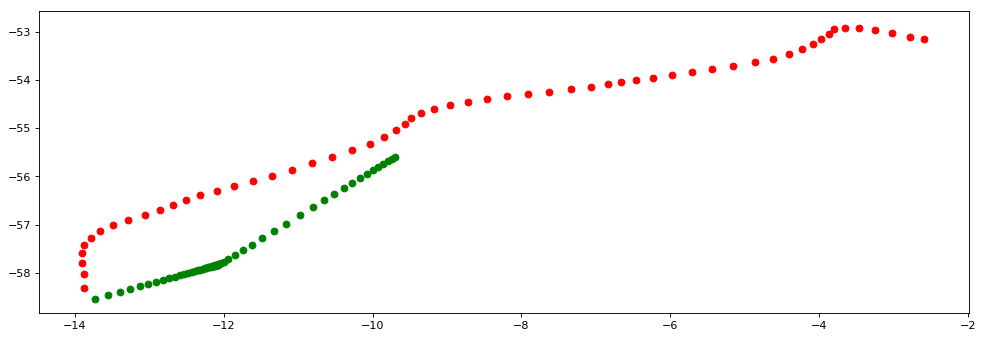

In [279]:
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

limit = 60
shift = np.random.randint(xTest.shape[0]-limit)

actions = xTest[shift:, -1, [-4, -3, -2, -1]]
position = dataset.loc[train + shift, ['x', 'y', 'z']].values
orientation = Quaternion(dataset.loc[train + shift, ['scalar', 'i', 'j', 'k']].values)

gen2 = predict(position=position, orientation=orientation, x0=xTest[shift].reshape(1, 3, 12), actions=actions)

for i in range(1, limit):
    pTrue = dataset.loc[i+train+shift, ['x', 'y', 'z']]
    o, p = next(gen2)

    plt.scatter(pTrue[0], pTrue[1], color='green')
    plt.scatter(p[0], p[1], color='red')